In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree



In [3]:
path = r"C:\Users\Lenovo\Desktop\Heart-Attack-Analysis-Prediction-Dataset\data\heart.csv"
df = pd.read_csv(path)
df.head()
df[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape


(303, 14)

In [9]:
# X as the Feature Matrix(data of df)
# Y as the response vector(target)

X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
X[0:5]

#SKlearn model does not handle categorical features. We can still convert these features to numerical values using Label Encoding.

y = df['output']
y[0:5]


0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [13]:
# Setting the Decision Tree model
from sklearn.model_selection import train_test_split
 


In [14]:
# The X and y are the arrays required before the split, the test size represents the ratio of the testing dataset, and the random_state ensures that
# we obtain the same splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [16]:
# Ensure that the dimensions are the same
X_train.shape


(212, 13)

In [18]:
y_train.shape

(212,)

In [19]:
X_test.shape

(91, 13)

In [20]:
y_test.shape

(91,)

In [21]:
# Modeling

heart_attack_tree = DecisionTreeClassifier( criterion="entropy", max_depth = 4)
heart_attack_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
heart_attack_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
#Prediction
predTree = heart_attack_tree.predict(X_test)

In [24]:
print (predTree [0:5])

[1 1 1 1 1]


In [25]:
print (y_test [0:5])

245    0
162    1
10     1
161    1
73     1
Name: output, dtype: int64


In [26]:
# Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print ("DecisionTree's Accuracy: " + str(metrics.accuracy_score(y_test, predTree)))

DecisionTree's Accuracy: 0.7692307692307693


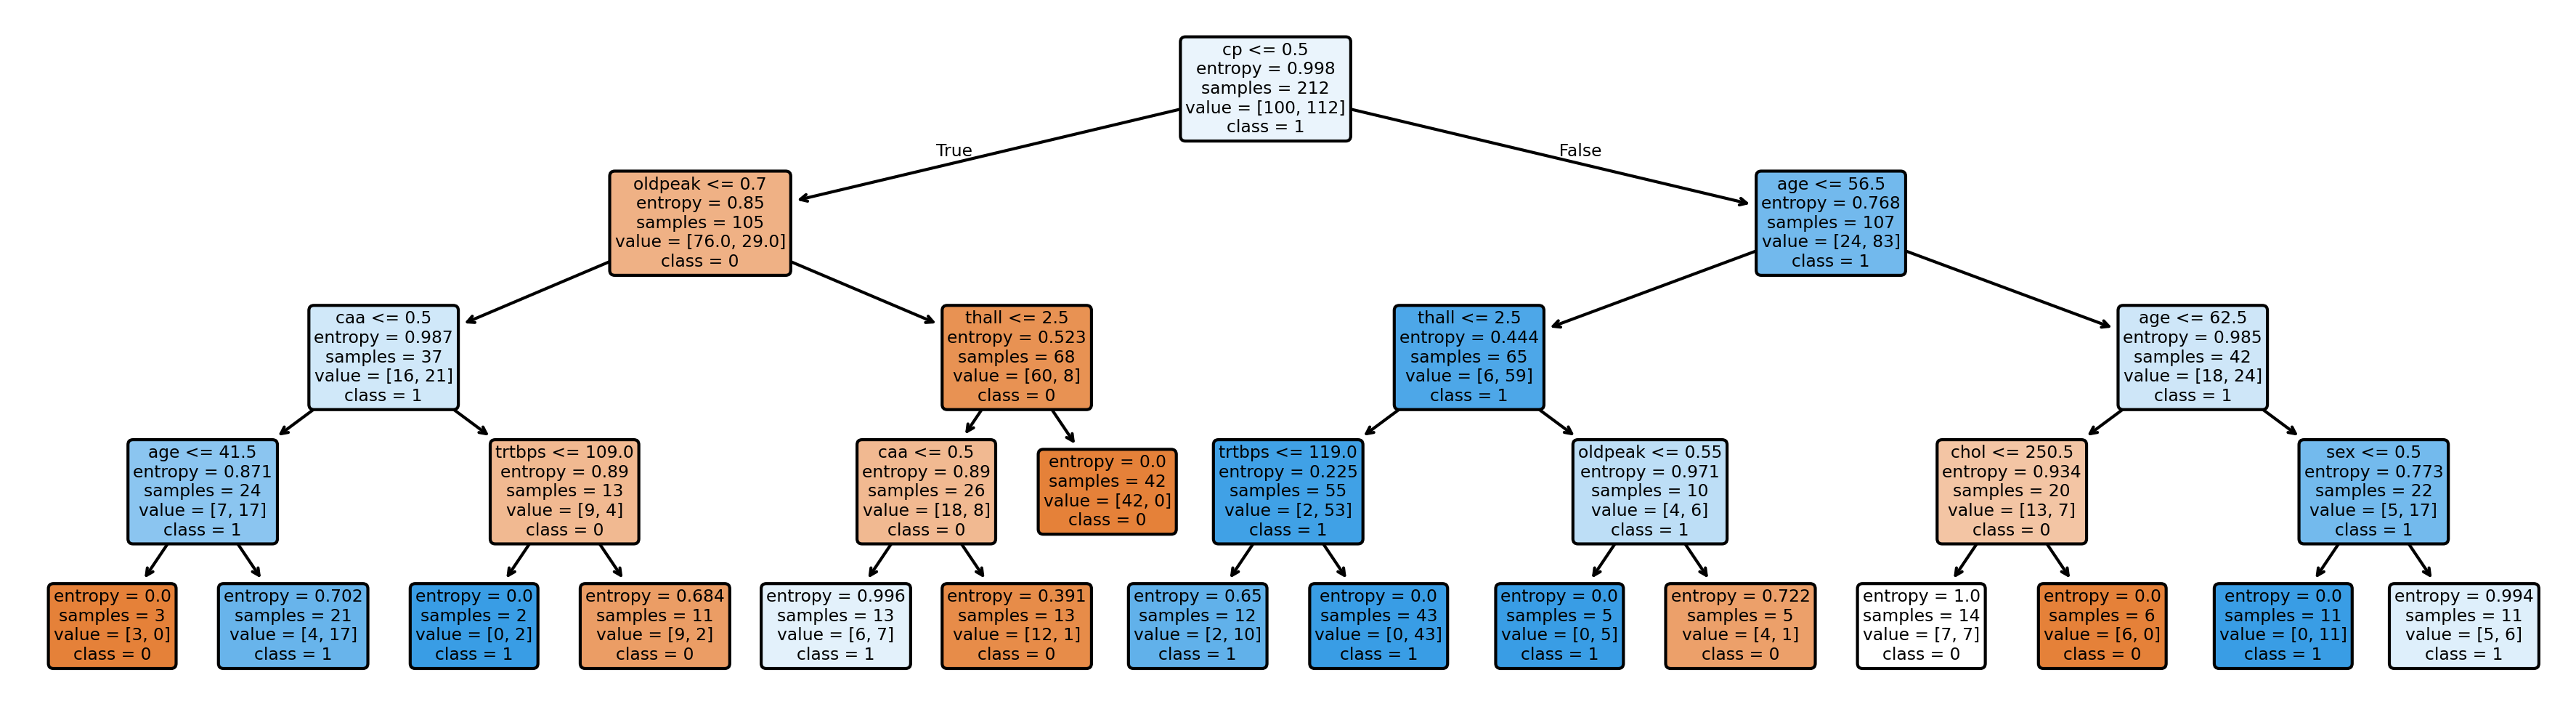

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 4), dpi=300)
tree.plot_tree(heart_attack_tree, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, ax=axes)
plt.show()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH